In [1]:
import sys
sys.path.insert(0, './src')
from matplotlib import pyplot as plt

from multiply_connected_pipe import Boundary, MultiplyConnectedPipeFromBoundaries

from curve import *
from pipe import *
from pipe.smooth_pipe import SmoothPipe
from utils import *

from matplotlib.path import Path


In [14]:
p1 = pt(-5,-1)
p2 = pt(5,-1)
p3 = pt(5,1)
p4 = pt(-5,1)

pts = [p1, p2, p3, p4]

l1 = Line
l2 = Cap
l3 = Line
l4 = Cap

ls = [l1, l2, l3, l4]

In [15]:
pipe = SmoothPipe(pts, ls)

In [16]:
pipe.build(tol=1e-8,density=20)

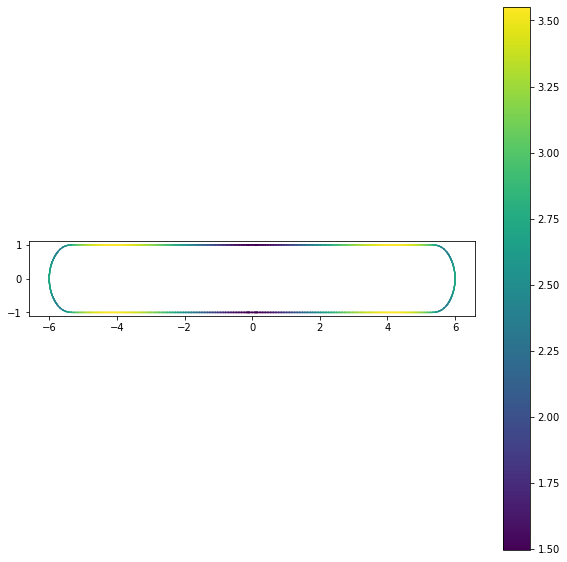

In [17]:
t = pipe.t
x = t.real
y = t.imag

fig, ax = plt.subplots(figsize=(10,10))
fig.colorbar(ax.scatter(x, y,s=0.1,c=np.abs(pipe.omegas[0])))
# fig.colorbar(ax.scatter(x, y,s=0.1,c=-u.imag))
ax.set_aspect('equal')
# ax.scatter(xs, ys,s=1,c='r')

In [18]:
the_pipe = pipe

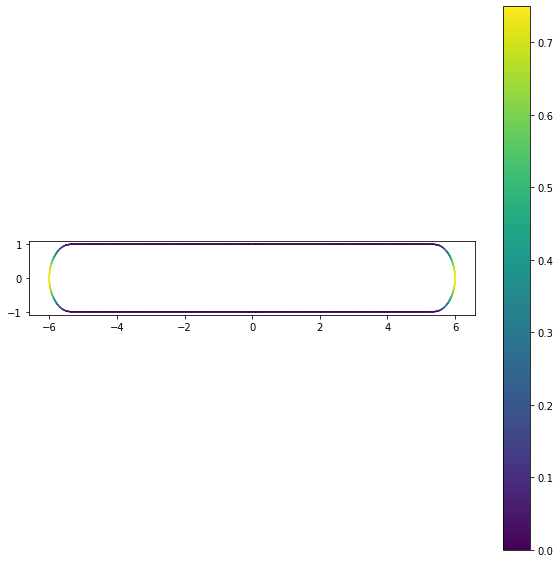

In [19]:
t = the_pipe.t
x = t.real
y = t.imag

fig, ax = plt.subplots(figsize=(10,10))
fig.colorbar(ax.scatter(x, y,s=0.1,c=-the_pipe.boundary_value(0).imag))
# fig.colorbar(ax.scatter(x, y,s=0.1,c=-u.imag))
ax.set_aspect('equal')
# ax.scatter(xs, ys,s=1,c='r')

In [20]:
xs = np.linspace(-5,5,500)
ys = np.linspace(-1,1,100)
xs,ys = np.meshgrid(xs,ys)

xs = xs
ys = ys

In [27]:
m = Path(np.array([p1,p2,p3,p4])).contains_points(np.array([xs.ravel(),ys.ravel()]).T)
# for ci in c:
#     m &= ~Path(np.array([ci.t.real,ci.t.imag]).T).contains_points(np.array([xs.ravel(),ys.ravel()]).T)
m = m.reshape(xs.shape)
m &= np.abs(ys) < 0.95
m &= np.abs(xs) < 4.95

In [28]:
U = the_pipe.velocity(xs[m].ravel(),ys[m].ravel(),the_pipe.omegas[0])

In [29]:
u = np.zeros_like(xs)
v = np.zeros_like(xs)

In [30]:
u[m] = U[:,0]
v[m] = U[:,1]
u[~m] = np.nan
v[~m] = np.nan

Text(0.5, 0.98, 'color=|velocity|')

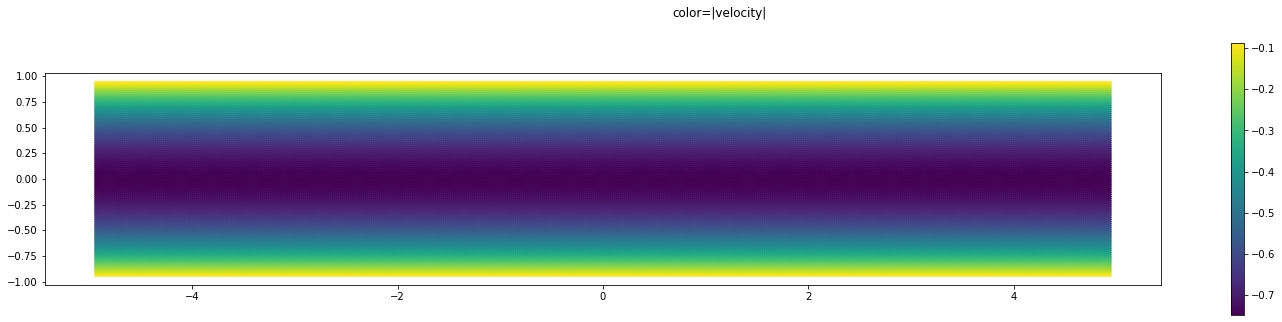

In [31]:
t = the_pipe.t
x = t.real
y = t.imag

fig, ax = plt.subplots(figsize=(25,5))
# ax.scatter(x, y,s=0.1,c=np.abs(the_pipe.omegas[0]))
ax.set_aspect('equal')

# ax.streamplot(xs,ys,u,v)

fig.colorbar(ax.scatter(xs, ys,s=4,c=u))

# for ci in c:
    # ax.plot(ci.t.real,ci.t.imag,c='r')
fig.suptitle('color=|velocity|')